In [1]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt 


2023-08-11 12:27:27.000995: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 12:27:27.542428: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 12:27:27.548853: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 12:27:29.650606: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fm = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fm.load_data()

4422102/4422102 [==============================] - 20s 4us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

<Figure size 1000x700 with 0 Axes>

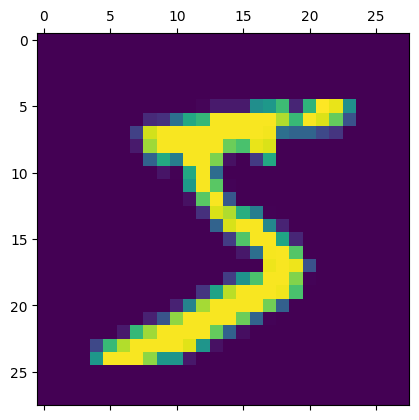

In [31]:
plt.figure(figsize=(10,7))
plt.matshow(X_train[0])

In [9]:
# normalize training data before training 
X_train = X_train / 255
X_test = X_test / 255

In [11]:
# build a model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
  28/1875 [..............................] - ETA: 7s - loss: 0.3670 - accuracy: 0.8705

2023-08-11 12:37:11.689496: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.3804 - accuracy: 0.8641
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3435 - accuracy: 0.8743
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3201 - accuracy: 0.8827
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3035 - accuracy: 0.8878
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2842 - accuracy: 0.8949
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2730 - accuracy: 0.8981
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2627 - accuracy: 0.9023
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2546 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2448 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2354 - accurac

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3406 - accuracy: 0.8832


[0.3405643403530121, 0.8831999897956848]

In [16]:
y_pred = model.predict(X_test)


313/313 [==============================] - 1s 2ms/step


In [17]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


In [18]:
y_pred[0]

array([3.4809669e-05, 1.0845232e-06, 8.6086793e-08, 2.6948008e-10,
       6.5406248e-06, 1.3092413e-03, 1.8017878e-06, 7.3965471e-03,
       3.2528470e-07, 9.9124956e-01], dtype=float32)

In [19]:
np.argmax(y_pred[0])

9

In [21]:
class_labels[np.argmax(y_pred[0])]

'Ankle boot'

In [22]:
mnist = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [24]:
# normalize the data
X_train = X_train / 255 
X_test = X_test / 255 


In [26]:
# build the model 
model = keras.Sequential([
    # flatten the 28*28 image to a 1D array 
    keras.layers.Flatten(input_shape=(28,28)),
    
    # fully connected layer 128 neutrons 
    keras.layers.Dense(128, activation='relu'),
    
    # drop out layer to prevent overfitting 
    keras.layers.Dropout(0.2),
    
    # output layer 
    keras.layers.Dense(10, activation='sigmoid')
])

In [27]:
# compile the model 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
model.fit(X_train, y_train, epochs=10)



Epoch 1/10


2023-08-11 12:57:33.968759: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2991 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1429 - accuracy: 0.9580
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.9670
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0852 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0736 - accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0649 - accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0582 - accuracy: 0.9814
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0535 - accuracy: 0.9823
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0476 - accuracy: 0.9842
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0439 - accurac